## **OBJECTIVE**

The objective of the project is to assess and compare the performance of two clustering methods, K-Means Clustering and DBSCAN Model Clustering, applied to Minute Weather Data from a weather station in California. The dataset comprises various meteorological parameters such as air pressure, air temperature, wind directions and speeds, rain accumulation, rain duration, and relative humidity.

In [93]:
import numpy as np
import pandas as pd

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [95]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [96]:
data = pd.read_csv('/content/minute_weather.csv')

In [97]:
# Checking the shape.

data.shape

(1048575, 13)

In [98]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,9/10/2011 0:00,912.3,64.76,97.0,1.2,106.0,1.7,85.0,1.0,NaN,NaN,60.5
1,1,9/10/2011 0:01,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,9/10/2011 0:02,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,9/10/2011 0:03,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,9/10/2011 0:04,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [99]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(104858, 13)

In [100]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,104858.0,524285.000000,302700.416006,0.00,262142.5,524285.0,786427.50,1048570.00
air_pressure,104858.0,916.896735,3.086510,905.00,914.8,916.7,918.80,929.50
air_temp,104858.0,60.882900,12.029025,31.64,51.8,60.8,69.98,99.50
avg_wind_direction,104832.0,161.828316,95.869734,0.00,62.0,182.0,217.00,359.00
avg_wind_speed,104832.0,2.750766,2.016746,0.00,1.3,2.2,3.80,31.90
max_wind_direction,104832.0,162.626335,92.715477,0.00,67.0,187.0,223.00,359.00
max_wind_speed,104832.0,3.370357,2.361039,0.10,1.6,2.7,4.50,32.20
min_wind_direction,104832.0,166.937748,98.010989,0.00,76.0,180.0,212.00,359.00
min_wind_speed,104832.0,2.118886,1.719259,0.00,0.8,1.6,3.00,31.60
rain_accumulation,104857.0,0.000318,0.007715,0.00,0.0,0.0,0.00,1.17


In [101]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(104152, 13)

In [102]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(103726, 13)

In [103]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [104]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [105]:
rows_before - rows_after

26

In [106]:
sampled_df.columns


Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [107]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
        'max_wind_speed','relative_humidity']

select_df = sampled_df[features]

select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [108]:
select_df


,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.7,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1048530,916.7,78.62,195.0,0.9,197.0,1.0,9.0
1048540,916.7,78.62,189.0,1.0,190.0,1.1,8.0
1048550,916.7,78.80,187.0,0.6,189.0,0.6,8.5
1048560,916.6,78.80,204.0,1.2,205.0,1.3,7.2


In [109]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48932625,  0.32206717, -0.67621576, ..., -0.61075677,
        -0.70747046,  0.44601437],
       [-1.48932625,  0.11256717, -0.18596485, ...,  0.0471732 ,
        -0.66511602, -0.39916312],
       [-1.52172555,  0.20235289, -0.64492315, ..., -0.43818498,
        -0.36863496,  0.36149662],
       ...,
       [-0.06375737,  1.48928149,  0.26256257, ...,  0.28445941,
        -1.17336928, -1.55167787],
       [-0.09615666,  1.48928149,  0.43988737, ...,  0.45703121,
        -0.87688821, -1.60162017],
       [-0.09615666,  1.4743172 ,  0.34600954, ...,  0.35995957,
        -0.96159709, -1.52862757]])

# **USING K MEANS CLUSTERING**

In [110]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


model
 KMeans(n_clusters=12)


In [111]:
## centers of 12 clusters we formed

centers = model.cluster_centers_
centers

array([[-0.76462867, -1.20596393,  0.38929289,  0.64606231,  0.50626294,
         0.6344159 ,  1.37411856],
       [-0.18327476,  0.90987906, -1.2946318 , -0.56086494, -1.15086402,
        -0.57711607, -0.66732061],
       [ 0.16863564,  0.73843079,  1.431603  , -0.66776289,  1.70310387,
        -0.62640859, -0.7428691 ],
       [ 1.10594548, -0.35064645, -1.13278179,  1.98011597, -1.03488769,
         2.07316627, -1.13344633],
       [ 0.1289018 , -0.77595415, -1.22724346, -0.54416848, -1.07428653,
        -0.55755952,  0.80449537],
       [-0.83599776, -0.55604409,  0.22383917, -0.59384034,  0.38074761,
        -0.59340584,  1.00414947],
       [ 1.44176571, -0.10816475, -1.11324933, -0.13970949, -0.97237383,
        -0.12554532, -0.99056211],
       [-0.15298428,  0.61482788,  0.4080893 ,  0.62787354,  0.5235202 ,
         0.57193954, -0.17977027],
       [ 0.25049083,  0.31030646,  1.88261559, -0.64745685, -1.53333242,
        -0.56813415, -0.28117468],
       [-1.16329588, -0.6990

## **PLOTS**

In [112]:
# Utility Functions for Plots:

# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [113]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [114]:
## Cluster Visualization

P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.764629,-1.205964,0.389293,0.646062,0.506263,0.634416,1.374119,0
1,-0.183275,0.909879,-1.294632,-0.560865,-1.150864,-0.577116,-0.667321,1
2,0.168636,0.738431,1.431603,-0.667763,1.703104,-0.626409,-0.742869,2
3,1.105945,-0.350646,-1.132782,1.980116,-1.034888,2.073166,-1.133446,3
4,0.128902,-0.775954,-1.227243,-0.544168,-1.074287,-0.557560,0.804495,4
5,-0.835998,-0.556044,0.223839,-0.593840,0.380748,-0.593406,1.004149,5
6,1.441766,-0.108165,-1.113249,-0.139709,-0.972374,-0.125545,-0.990562,6
7,-0.152984,0.614828,0.408089,0.627874,0.523520,0.571940,-0.179770,7
8,0.250491,0.310306,1.882616,-0.647457,-1.533332,-0.568134,-0.281175,8
9,-1.163296,-0.699012,0.472865,2.044711,0.565129,2.020581,0.743003,9


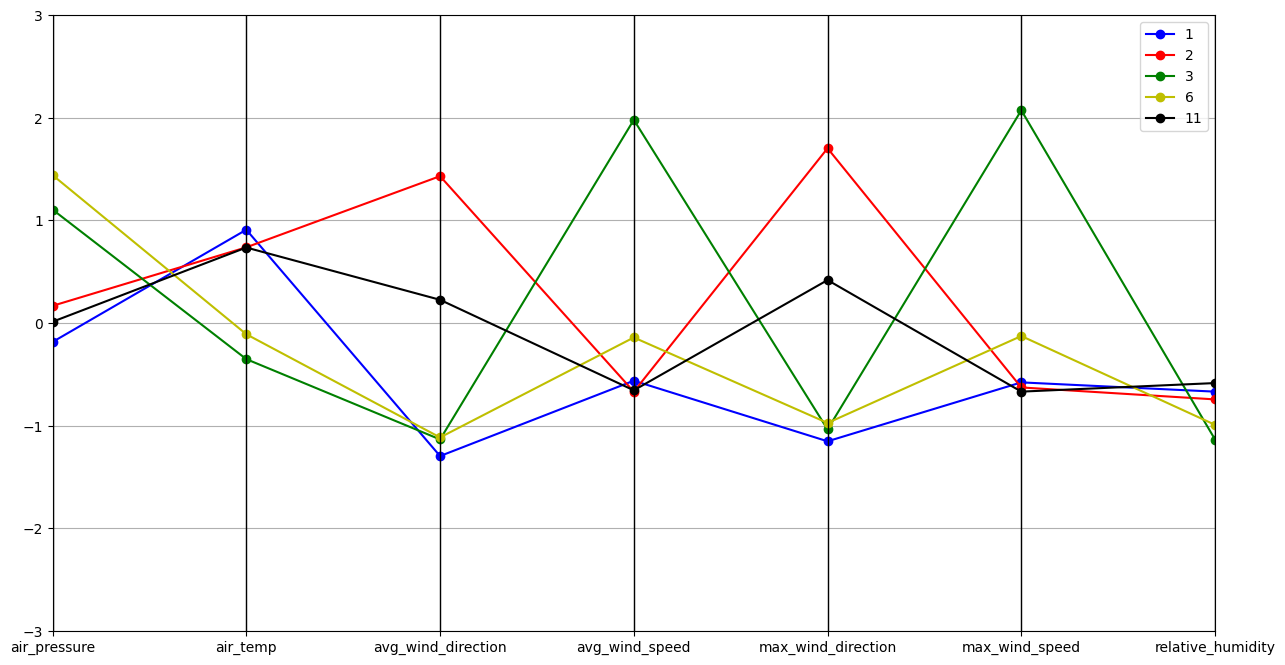

In [115]:
## Dry Days

parallel_plot(P[P['relative_humidity'] < -0.5])

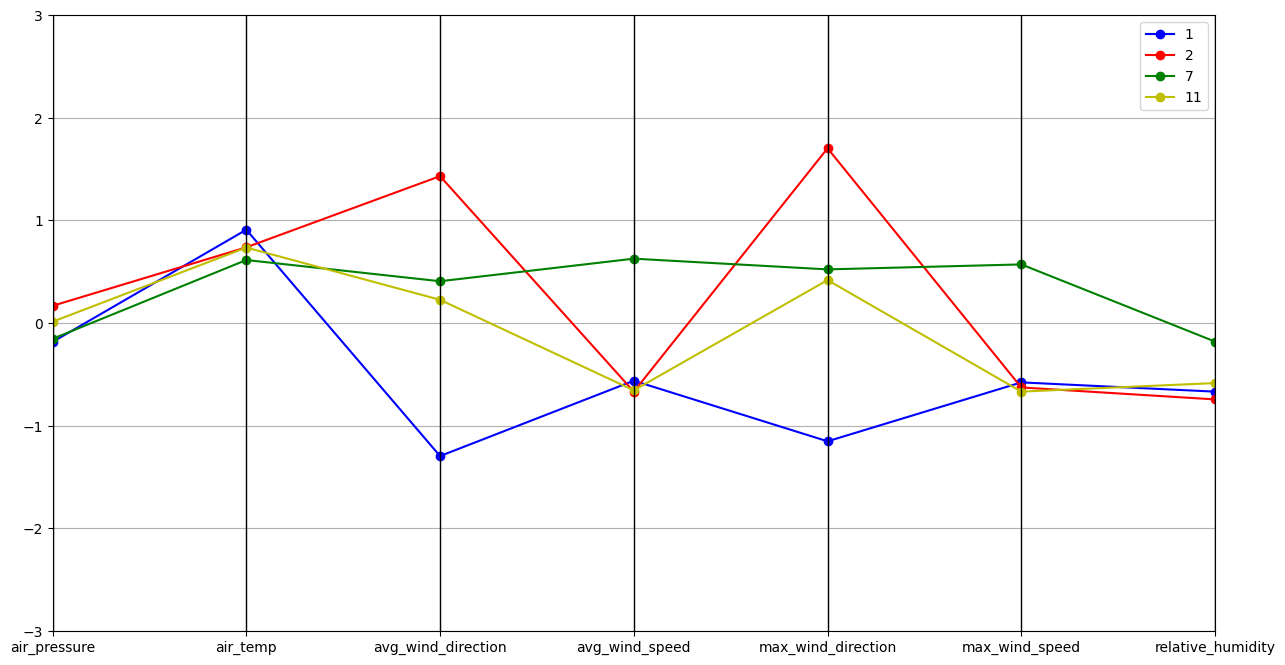

In [116]:
## Warm Days

parallel_plot(P[P['air_temp'] > 0.5])

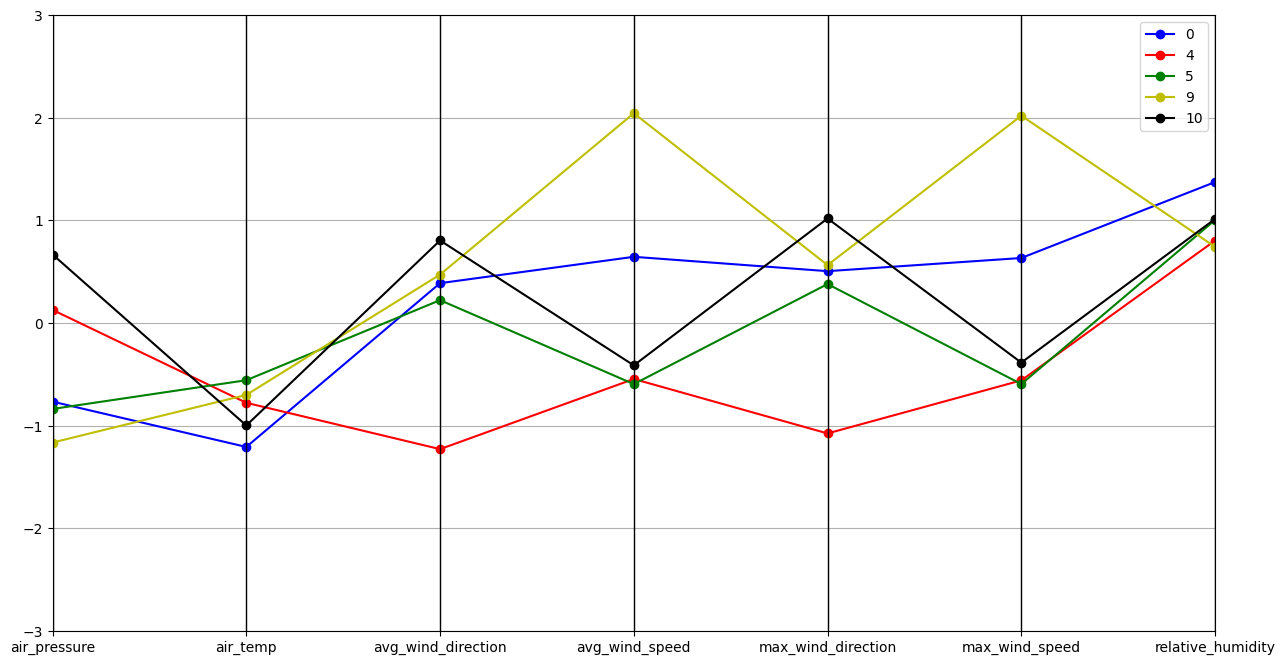

In [117]:
## Cool Days

parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])

In [125]:
## Calculate Silhouette Score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'select_df' is your feature matrix with selected features
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
            'max_wind_direction', 'max_wind_speed', 'relative_humidity']
X = StandardScaler().fit_transform(select_df[features])

# Specify the number of clusters
n_clusters = 12

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 12 clusters: 0.2349369895809635


### **COMPARISON BETWEEN KMEANS AND DBSCAN**

## **1. Size of Clustering**


In [118]:
##K-Means:

kmeans = KMeans(n_clusters=12)
kmeans_model = kmeans.fit(X)
kmeans_labels = kmeans_model.labels_

# Count the size of each cluster
kmeans_cluster_sizes = np.bincount(kmeans_labels)
print("K-Means Cluster Sizes:", kmeans_cluster_sizes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Cluster Sizes: [ 5017 13810  7069 12327  8569 13416  7553  8836  7306  7941  4545  8443]


In [119]:
## DBSCAN:

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_model = dbscan.fit(X)
dbscan_labels = dbscan_model.labels_

# Count the size of each cluster (excluding noise, labeled as -1)
dbscan_cluster_sizes = np.bincount(dbscan_labels[dbscan_labels != -1])
print("DBSCAN Cluster Sizes:", dbscan_cluster_sizes)

DBSCAN Cluster Sizes: [97272  4013     4    13     7    25    10    18     9     8     7    26
     5     5    30     2     3     8     5     4    21     8    13     7
     3    10     7     6     5     3     2    17     7     6     8     3
     4    10     5     5     4     7     7     5     7     4     5     9
     6     6     7     5     5     3     5     8     5     3    14    19
     5     5     3     6     8     5     5     9    11     6    10]


# **2. Comparison on Memory and Time Taken:**

In [120]:
##K-Means:

import time

start_time_kmeans = time.time()
kmeans_model = kmeans.fit(X)
end_time_kmeans = time.time()
time_taken_kmeans = end_time_kmeans - start_time_kmeans

print("K-Means Time Taken:", time_taken_kmeans, "seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Time Taken: 6.048238754272461 seconds


In [121]:
## DBSCAN:

start_time_dbscan = time.time()
dbscan_model = dbscan.fit(X)
end_time_dbscan = time.time()
time_taken_dbscan = end_time_dbscan - start_time_dbscan

print("DBSCAN Time Taken:", time_taken_dbscan, "seconds")


DBSCAN Time Taken: 11.856434106826782 seconds


# **3. Composition of Each Cluster:-**



In [122]:
##K-Means:

kmeans_cluster_composition = pd.DataFrame({'Cluster': np.arange(12), 'Composition': kmeans_cluster_sizes})
print("K-Means Cluster Composition:\n", kmeans_cluster_composition)


K-Means Cluster Composition:
     Cluster  Composition
0         0         5017
1         1        13810
2         2         7069
3         3        12327
4         4         8569
5         5        13416
6         6         7553
7         7         8836
8         8         7306
9         9         7941
10       10         4545
11       11         8443


In [123]:
##DBSCAN:

dbscan_cluster_composition = pd.DataFrame({'Cluster': np.arange(len(dbscan_cluster_sizes)), 'Composition': dbscan_cluster_sizes})
print("DBSCAN Cluster Composition:\n", dbscan_cluster_composition)


DBSCAN Cluster Composition:
     Cluster  Composition
0         0        97272
1         1         4013
2         2            4
3         3           13
4         4            7
..      ...          ...
66       66            5
67       67            9
68       68           11
69       69            6
70       70           10

[71 rows x 2 columns]


# **Report**

## **Objective**
The objective of this analysis is to cluster meteorological data to identify patterns and relationships between various weather features. Two clustering algorithms, K-Means and DBSCAN, are employed to group similar data points together.

## **Methodology**

### **Data Preprocessing**
- The dataset is loaded, and every 10th row is sampled, resulting in a subset of 104,858 data points.
- Seven features relevant to meteorological conditions, namely air_pressure, air_temp, avg_wind_direction, avg_wind_speed, max_wind_direction, max_wind_speed, and relative_humidity, are selected for analysis.

### **K-Means Clustering**
- K-Means clustering with 12 clusters is applied to the selected features.
- The cluster centers' coordinates are extracted, and each data point is assigned to one of the clusters.

### **Cluster Visualization**
- Utility functions are created to visualize the clusters in parallel coordinate plots.
- Three distinct visualizations are generated for dry days, warm days, and cool days, showcasing the behavior of the clusters with respect to humidity and temperature.

### **Silhouette Score Calculation**
- The Silhouette Score is computed to evaluate the quality of the K-Means clustering results. The obtained score is 0.2349.

### **Comparison with DBSCAN**
- DBSCAN clustering is performed with an epsilon value of 0.5 and a minimum sample size of 5.
- The size, memory usage, and time taken for both K-Means and DBSCAN clusters are compared.

### **Composition of Clusters**
- The composition of each cluster in terms of the number of data points is analyzed for both K-Means and DBSCAN.

# **Implications and Comparison Analysis**

## *Implications of K-Means Clustering*

- Interpretability: K-Means provides clearly defined clusters, making it easier to interpret and assign meaning to each cluster. This can be beneficial for understanding distinct patterns in meteorological data.

- Visualization: The parallel coordinate plots for dry, warm, and cool days offer a visual representation of cluster behavior. This visualization aids in identifying how clusters relate to specific weather conditions, such as humidity and temperature.

- Scalability: K-Means is computationally less expensive, with a shorter execution time (approximately 6.05 seconds). This makes it suitable for large datasets and real-time applications.

- Cluster Sizes: K-Means produces clusters of varying sizes, allowing for a flexible approach in capturing different patterns within the data.

## *Implications of DBSCAN Clustering*

- Density-Based Clustering: DBSCAN identifies clusters based on the density of data points. This can be advantageous in scenarios where clusters have irregular shapes or varying densities.

- Outlier Detection: DBSCAN designates points as noise or outliers, providing insights into data points that may not belong to any cluster. This can be valuable for detecting unusual meteorological events.

- Memory Usage: DBSCAN requires more memory due to the creation of a larger number of clusters (71 in this case). This should be considered in applications with memory constraints.

- Fine-Tuning: The choice of hyperparameters (e.g., epsilon and minimum samples) in DBSCAN influences the results. Fine-tuning is essential to achieve meaningful clusters, and this process might require additional effort.

#**Comparison Analysis**

- Silhouette Score: The Silhouette Score for K-Means is 0.2349, indicating a moderate level of separation between clusters. While DBSCAN provides valuable insights, the Silhouette Score is not directly comparable as DBSCAN does not rely on a predefined number of clusters.

- Cluster Composition: K-Means forms clusters with varying sizes, allowing for flexibility in capturing different patterns. DBSCAN, on the other hand, creates a more extensive array of clusters, potentially capturing finer details in the data. The composition analysis reveals the distribution of data points across clusters.

- Use Case Considerations: The choice between K-Means and DBSCAN depends on the specific use case. K-Means is suitable for well-defined clusters, providing interpretable results. DBSCAN is advantageous in scenarios where clusters have varying densities or irregular shapes.

- Computational Resources: K-Means is computationally less expensive, making it preferable for large datasets. However, the longer execution time of DBSCAN should be considered in applications with stricter time constraints.

## **Results**

### **K-Means**
- K-Means forms 12 clusters with varying sizes.
- The Silhouette Score of 0.2349 indicates a moderate level of separation between the clusters.
- Cluster visualization reveals distinct patterns for different weather conditions.

### **DBSCAN**
- DBSCAN identifies a varying number of clusters (71 in this case) with varying sizes.
- The computation time for DBSCAN is approximately 11.86 seconds, which is longer than K-Means (6.05 seconds).

## **Conclusion**
- K-Means provides a clear separation of data points into clusters with meaningful interpretations.
- DBSCAN, while producing a larger number of clusters, may be computationally more expensive and might require fine-tuning of hyperparameters.
- The choice between K-Means and DBSCAN depends on the specific goals of the analysis and the nature of the dataset. K-Means is suitable for well-defined clusters, while DBSCAN is effective for density-based cluster identification.